### Student Information
Name: 王昊平

Student ID: 109020005

GitHub ID: howardwang1005

Kaggle name: hao

Kaggle private scoreboard snapshot: (Second Part)
![pic0](/Users/howard891005/Documents/GitHub/DM2023-Lab2-Master/pics/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#First Part

## 1.1 Load data

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from scipy.sparse import csr_matrix, find

count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
test_counts = count_vect_test.fit_transform(test_df.text)

train_matrix = csr_matrix(train_counts.toarray())
train = find(train_matrix)
train_term = list(train[1])
test_matrix = csr_matrix(test_counts.toarray())
test = find(test_matrix)
test_term = list(test[1])

#use counter to find the 30 terms appear
train_counters = Counter(train_term)
train_most = train_counters.most_common(30)
test_counters = Counter(test_term)
test_most = test_counters.most_common(30)

# the 30 most terms
plot_train = []
for i in train_most:
    plot_train.append(count_vect_train.get_feature_names_out()[i[0]])
print(plot_train)
plot_test = []
for i in test_most:
    plot_test.append(count_vect_test.get_feature_names_out()[i[0]])

plot_test

['the', 'to', 'and', 'is', 'of', 'it', 'you', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'just', 'but', 'not', 'with', 'can', 'at', 'like', 'all', 'when', 'are', 'if', 'your', 'was']


['the',
 'to',
 'and',
 'is',
 'of',
 'it',
 'in',
 'you',
 'that',
 'for',
 'my',
 'on',
 'be',
 'me',
 'so',
 'all',
 'just',
 'have',
 'at',
 'can',
 'was',
 'are',
 'but',
 'with',
 'your',
 'up',
 'not',
 'this',
 'like',
 'get']

## 1.2 Save Data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
## 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

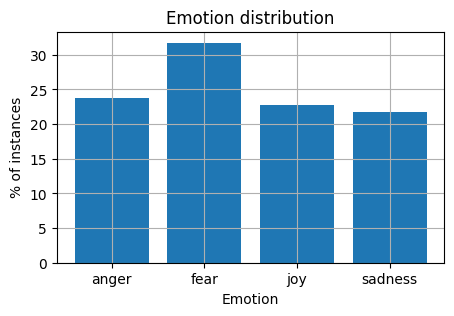

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
## Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
## ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# build analyzers (TF-IDF)
TF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TF_vectorizer.fit(train_df['text'])

TF_features = TF_vectorizer.transform(train_df['text'])

# check dimension
TF_features.shape

feature_names_500_TF = TF_vectorizer.get_feature_names_out()
feature_names_500_TF[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'fear', 'anger', 'fear', 'anger',
       'sadness', 'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

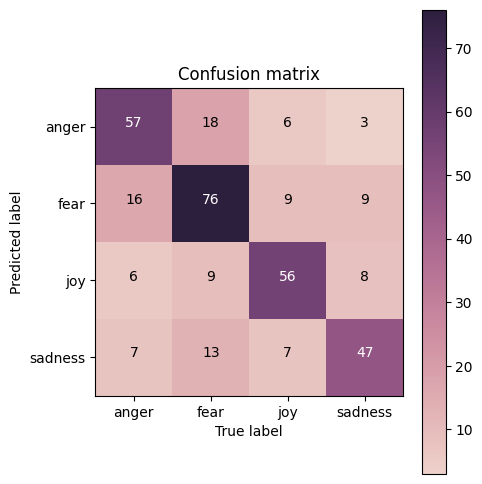

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

'joy' is very differeny from 3 other emotions, so it has higher accuracy. 'anger', 'fear' and 'sadness' are all negative emotions, some cases would be classified wrong.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

NB = MultinomialNB()
NB.fit(X_train, y_train)

y_train_pred_NB=NB.predict(X_train)
y_test_pred_NB=NB.predict(X_test)

print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))

print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Navie Bayes has better accuracy than Decision Tree. In my opinion, Decision Tree classifies the sentences step by step according to words, however, it can't tell the importance of words. For example, if a sentence uses double negative way, it may classify wrong. Naive Bayes uses condition probability, so it can calculate the relation between words compare to Decision Tree.

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 368       anger
585       anger
656       anger
3081    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/drive/MyDrive/DM2023-Lab2-Master/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 2s 7ms/step - loss: 1.3194 - accuracy: 0.3634 - val_loss: 1.2733 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 1s 5ms/step - loss: 0.9825 - accuracy: 0.6427 - val_loss: 0.9498 - val_accuracy: 0.6311
Epoch 3/25
113/113 [==============================] - 1s 4ms/step - loss: 0.5955 - accuracy: 0.7899 - val_loss: 0.8034 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8494 - val_loss: 0.7779 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.3245 - accuracy: 0.8838 - val_loss: 0.8163 - val_accuracy: 0.7147
Epoch 6/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2656 - accuracy: 0.9081 - val_loss: 0.8674 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9308 - val_loss: 0.9497 - val_accuracy: 0.7032
Epoch 

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 9ms/step


array([[5.4184737e-04, 1.9646673e-07, 4.0293642e-05, 9.9941766e-01],
       [3.9857626e-04, 2.4526511e-01, 4.9911512e-05, 7.5428641e-01],
       [8.6923385e-01, 6.4843394e-02, 4.0417709e-04, 6.5518469e-02],
       [1.2780337e-03, 9.9805218e-01, 2.5039990e-04, 4.1921958e-04],
       [9.9242145e-01, 1.4888748e-06, 2.1609112e-07, 7.5767222e-03]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'anger', 'fear', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.7


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363410,1.319367,0.423631,1.273273
1,1,0.642679,0.982513,0.631124,0.949786
2,2,0.789925,0.595506,0.677233,0.803409
3,3,0.849433,0.417153,0.697406,0.777946
4,4,0.883753,0.324475,0.714697,0.816335
5,5,0.908110,0.265619,0.691643,0.867366
6,6,0.930805,0.212526,0.703170,0.949726
7,7,0.942984,0.179563,0.697406,0.978164
8,8,0.953778,0.152343,0.685879,1.055724
9,9,0.960974,0.133107,0.674352,1.141300


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

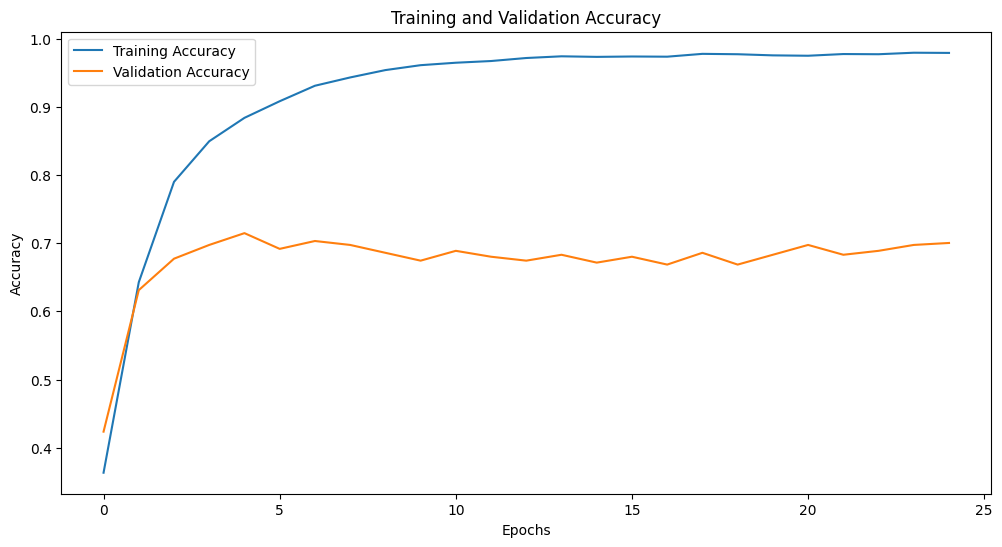

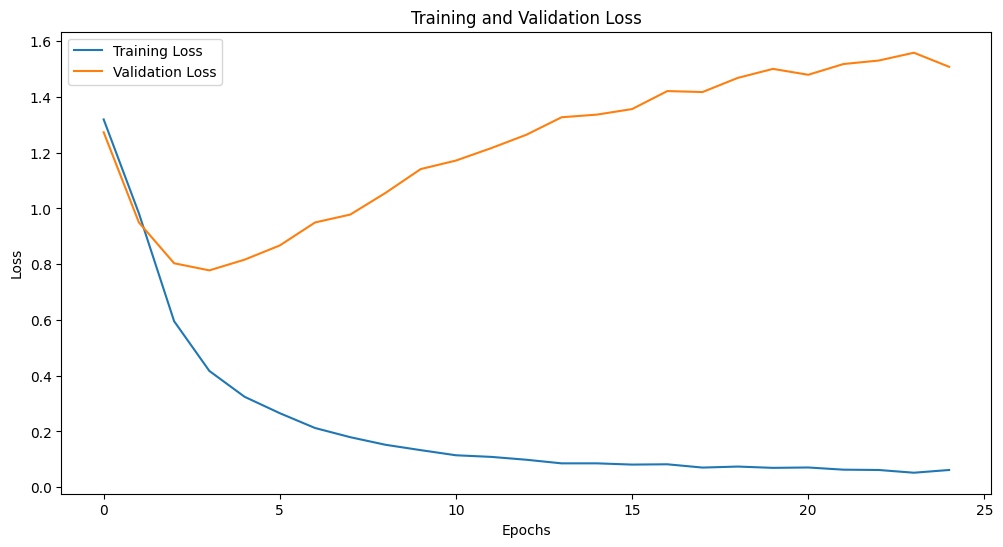

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As long as the epoch increaes, the train accuracy also increase, however, the val accuracy doesn't increase. I think it's because overfitting. Train accuracy stays high, but val accuracy can't get higher.

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2113,30109,You're so cute @katienolan #truelove #hilariou...,"[You, 're, so, cute, @, katienolan, #, truelov..."
2018,30014,😱 @cailamarsai you've had me 😂 😂 the whole tim...,"[😱, @, cailamarsai, you, 've, had, me, 😂, 😂, t..."
820,10820,pray for my boy huff,"[pray, for, my, boy, huff]"
5,10005,My blood is boiling,"[My, blood, is, boiling]"
1528,20671,I am in #shock and #awe and the places my #tod...,"[I, am, in, #, shock, and, #, awe, and, the, p..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['You', "'re", 'so', 'cute', '@', 'katienolan', '#', 'truelove', '#', 'hilarious', '@', 'GarbageTime', '#', 'beautiful', '&', 'amp', ';', '#', 'graceful', 'never', 'heard', 'explicits', 'spoken', 'with', 'such', 'elegance', '.', '#', 'Mingo']),
       list(['😱', '@', 'cailamarsai', 'you', "'ve", 'had', 'me', '😂', '😂', 'the', 'whole', 'time', 'watching', '@', 'black_ishABC', 'after', 'you', "'ve", 'lost', 'your', '#', 'glasses', '!', 'It', 'was', '#', 'hilarious', '!', '@', 'mrbabyboogaloo']),
       list(['pray', 'for', 'my', 'boy', 'huff'])], dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.34546188,  0.41448772, -0.34051663,  0.44752494, -0.24478953,
       -1.1144078 ,  0.48609674,  1.2509619 , -0.6672363 , -0.60434127,
       -0.71313006, -0.4224066 , -0.48916933,  0.27335578, -0.14324844,
       -0.45380583,  0.25604814, -1.1171327 ,  0.38454685, -1.4541501 ,
        0.43729034,  0.80189896,  0.7146844 ,  0.20832849,  0.32495788,
       -0.18299602, -0.3766029 ,  0.6164385 , -0.11161727,  0.5522038 ,
        0.59740293, -0.18135642,  0.42366695, -0.341796  , -0.45874497,
        0.9751952 ,  0.4474515 , -0.31555516, -0.7684898 , -0.6463988 ,
        0.3340829 , -0.1046289 ,  0.22922935,  0.59294087,  0.9290843 ,
       -0.16878454, -0.740536  , -0.08030226,  0.7661931 ,  0.17558435,
       -0.00312385, -0.61006695,  0.58101225, -0.12940039, -0.40363467,
       -0.1388396 ,  0.06799802, -0.18306908, -0.496878  , -0.16815524,
        0.02803534, -0.04052798,  0.46420413, -0.16955684, -0.2916791 ,
        0.25858635,  0.25395715,  0.436074  , -1.1624424 ,  0.16

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9425477385520935),
 ('bday', 0.9313801527023315),
 ('O', 0.9184449911117554),
 ("'you", 0.9166014194488525),
 ('PUSSY\\nP', 0.9072895050048828),
 ('Online', 0.9045376777648926),
 ('plz', 0.9041188955307007),
 ('bear', 0.9039029479026794),
 ('Be', 0.9032554030418396),
 ('play', 0.90253084897995)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/DM2023-Lab2-Master/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


1. Average (Word2Vec vectors) : Take the average of all the word vectors in a sentence.
2. Average (Word2Vec vectors with TF-IDF) : Take the word vectors and multiply it with their TF-IDF scores.
3. Other Vectorize methods : Such as Doc2Vec, we can just gather vectors for each sentence.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

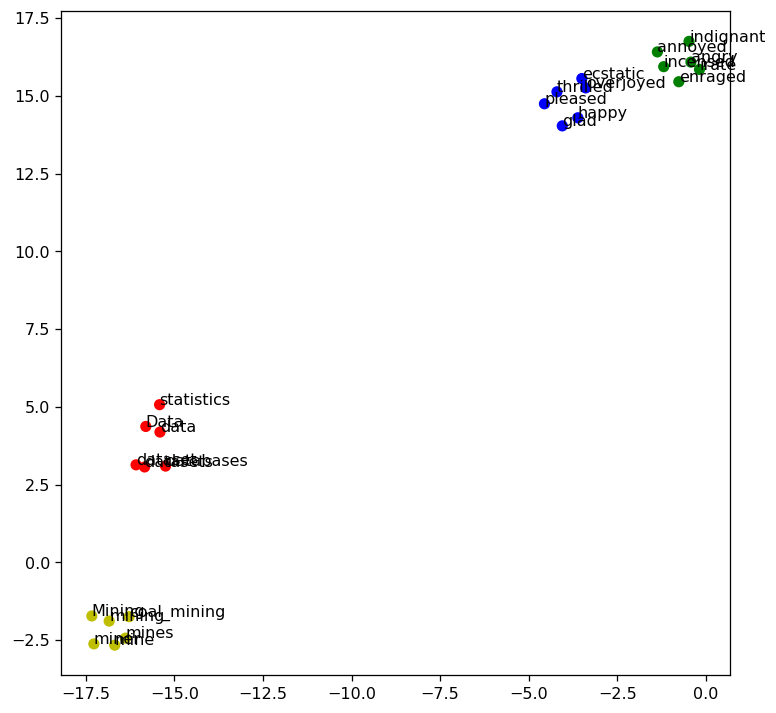

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

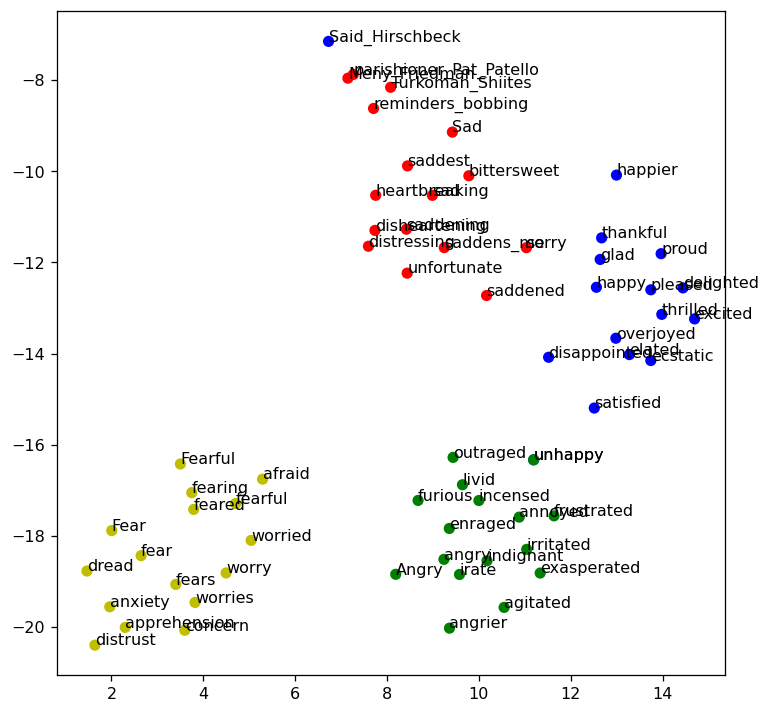

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#Third Part

In [ ]:
import os
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
import random

from sklearn import preprocessing
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, confusion_matrix,accuracy_score,classification_report
from sklearn.decomposition import PCA
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


##data reading

In [ ]:
data_file_path = '/content/drive/MyDrive/DM2023-Lab2-Master/dm2023-isa5810-lab2-homework/data_identification.csv'
emotion_file_path =  '/content/drive/MyDrive/DM2023-Lab2-Master/dm2023-isa5810-lab2-homework/emotion.csv'
tweet_file_path =  '/content/drive/MyDrive/DM2023-Lab2-Master/dm2023-isa5810-lab2-homework/tweets_DM.json'


data_df = pd.read_csv(data_file_path)
emotions_df = pd.read_csv(emotion_file_path)
tweets = pd.read_json(tweet_file_path, lines=True)

df = data_df
tweets

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [ ]:
sampleSub_file_path =  '/content/drive/MyDrive/DM2023-Lab2-Master/dm2023-isa5810-lab2-homework/sampleSubmission.csv'
sampleSub_df = pd.read_csv(sampleSub_file_path)

#Preprocessing

In [ ]:
merged_df = data_df.merge(emotions_df, on='tweet_id', how='left')

# 合併數據
print(merged_df.head())

   tweet_id identification emotion
0  0x28cc61           test     NaN
1  0x29e452          train     joy
2  0x2b3819          train     joy
3  0x2db41f           test     NaN
4  0x2a2acc          train   trust


###將 tweet id 與 text 從_source中取出

In [ ]:
tweets['tweet_id'] = tweets['_source'].apply(lambda x: x['tweet']['tweet_id'])
tweets['text'] = tweets['_source'].apply(lambda x: x['tweet']['text'])

In [ ]:
tweets

,_score,_index,_source,_crawldate,_type,tweet_id,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,0x24faed,"Ah, corporate life, where you can date <LH> us..."


###根據 tweet_id merge 對應的 tweets

In [ ]:
final_df = pd.merge(merged_df, tweets, on='tweet_id')

In [ ]:
final_df

,tweet_id,identification,emotion,_score,_index,_source,_crawldate,_type,text
0,0x28cc61,test,NaN,107,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x28cc...",2017-01-17 14:13:32,tweets,@Habbo I've seen two separate colours of the e...
1,0x29e452,train,joy,809,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29e4...",2015-01-17 03:07:03,tweets,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,808,hashtag_tweets,"{'tweet': {'hashtags': ['spateradio', 'app'], ...",2016-07-02 09:34:06,tweets,Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,NaN,728,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2db4...",2015-10-17 06:46:20,tweets,@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,trust,16,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a2a...",2016-08-15 18:18:39,tweets,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
...,...,...,...,...,...,...,...,...,...
1867530,0x227e25,train,disgust,361,hashtag_tweets,"{'tweet': {'hashtags': ['rip'], 'tweet_id': '0...",2016-09-09 14:28:19,tweets,@BBCBreaking Such an inspirational talented pe...
1867531,0x293813,train,sadness,15,hashtag_tweets,"{'tweet': {'hashtags': ['libtards', 'Hillary',...",2017-02-04 14:15:32,tweets,And still #libtards won't get off the guy's ba...
1867532,0x1e1a7e,train,joy,174,hashtag_tweets,"{'tweet': {'hashtags': ['seeds', 'Joy', 'GLTCh...",2015-12-03 16:53:39,tweets,When you sow #seeds of service or hospitality ...
1867533,0x2156a5,train,trust,515,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2156...",2016-10-27 03:23:51,tweets,@lorettalrose Will you be displaying some <LH>...


###分離train test dataset

In [ ]:
train_data = final_df[merged_df['identification'] == 'train']
test_data = final_df[merged_df['identification'] == 'test']

#Model

###在model的選擇，我挑了兩種去實作，一個是在TF-IDF下利用LogisticRegression的模型，另一個則是利用深度學習的模型（包含LSTM等應用），而最後我發現在深度學習的模型中的效果較好！

##Model - logisticRegression (TF-IDF)

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# text preprocess
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

# 分割訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['emotion'], test_size=0.2)

# 使用 TF-IDF 向量化
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# 訓練模型
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 模型评估
y_pred = model.predict(X_val_tfidf)
print(classification_report(y_val, y_pred))

# predict
X_test_tfidf = vectorizer.transform(test_data['text'])
test_predictions = model.predict(X_test_tfidf)


<ipython-input-38-daa4c90290bf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(preprocess_text)
<ipython-input-38-daa4c90290bf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].apply(preprocess_text)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

              precision    recall  f1-score   support

       anger       0.48      0.06      0.11      8046
anticipation       0.54      0.46      0.50     50093
     disgust       0.40      0.25      0.31     27738
        fear       0.70      0.21      0.33     12862
         joy       0.47      0.82      0.60    102515
     sadness       0.47      0.38      0.42     38849
    surprise       0.50      0.11      0.18      9787
       trust       0.53      0.20      0.29     41223

    accuracy                           0.49    291113
   macro avg       0.51      0.31      0.34    291113
weighted avg       0.50      0.49      0.45    291113



###此model在Public上的成績為 0.40555

##Model - Using Deep learning (Including Embedding Layer, SpatialDropout1D, LSTM, Dense Layer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



# 分割訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['emotion'], test_size=0.2)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_val_pad = pad_sequences(X_val_seq, maxlen=200)

# 建立模型
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=200)) # 將文本序列轉換為密集的向量表示
model.add(SpatialDropout1D(0.2)) # 降低過擬合
model.add(LSTM(100, dropout=0.2))  # 一種循環神經網絡，適合處理序列數據 , 移除 recurrent_dropout
model.add(Dense(len(label_encoder.classes_), activation='softmax')) # 使用softmax激活函數進行多類別分類

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(X_train_pad, y_train_categorical, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val_categorical))


X_test_seq = tokenizer.texts_to_sequences(test_data['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# predict
test_predictions = model.predict(X_test_pad)
test_predictions_labels = label_encoder.inverse_transform(test_predictions.argmax(axis=1))




Epoch 1/5
36390/36390 [==============================] - 405s 11ms/step - loss: 1.2504 - accuracy: 0.5479 - val_loss: 1.1768 - val_accuracy: 0.5731
Epoch 2/5
36390/36390 [==============================] - 389s 11ms/step - loss: 1.1677 - accuracy: 0.5769 - val_loss: 1.1505 - val_accuracy: 0.5830
Epoch 3/5
36390/36390 [==============================] - 388s 11ms/step - loss: 1.1452 - accuracy: 0.5856 - val_loss: 1.1443 - val_accuracy: 0.5855
Epoch 4/5
36390/36390 [==============================] - 388s 11ms/step - loss: 1.1329 - accuracy: 0.5900 - val_loss: 1.1360 - val_accuracy: 0.5886
Epoch 5/5
12875/12875 [==============================] - 51s 4ms/step


##這個model在public上的成績則為 0.47583 因此決定選擇這個model當最後成績評判的model

In [ ]:
predictions_series = pd.Series(test_predictions_labels)
test_data = test_data.reset_index(drop=True)

# result_df => 對應id 與 預測的emotion
result_df = pd.DataFrame({
    'tweet_id': test_data['tweet_id'],
    'predicted_emotion': predictions_series
})

result_df

,tweet_id,predicted_emotion
0,0x28cc61,joy
1,0x2db41f,sadness
2,0x2466f6,joy
3,0x23f9e9,disgust
4,0x1fb4e1,disgust
...,...,...
411967,0x2c4dc2,joy
411968,0x31be7c,anticipation
411969,0x1ca58e,joy
411970,0x35c8ba,joy


In [ ]:
sampleSub_df

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


###按照Sample submission格式 將對應tweet_id的predict_emotion加入並輸出成csv檔

In [ ]:
final_submission = sampleSub_df.merge(result_df, left_on='id', right_on='tweet_id', how='left')

In [ ]:
final_sub = final_submission.drop(columns=['emotion','tweet_id'])

In [ ]:
predict_file_path =  '/content/drive/MyDrive/DM2023-Lab2-Master/dm2023-isa5810-lab2-homework/predicted_emotions.csv'
final_sub = final_submission.drop(columns=['emotion','tweet_id'])